<a href="https://colab.research.google.com/github/DanielBinh2k3/BTVN_Lab1/blob/main/BtapLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
lst = [-4, -2, -1, 0, 1, 3, 6]
def _sigmoid(x):
  return 1/(1+np.exp(-x))
for i, ele in enumerate(lst):
  print("Result "+ str(i +1) + ": " + str(_sigmoid(ele)))

Result 1: 0.01798620996209156
Result 2: 0.11920292202211755
Result 3: 0.2689414213699951
Result 4: 0.5
Result 5: 0.7310585786300049
Result 6: 0.9525741268224334
Result 7: 0.9975273768433653


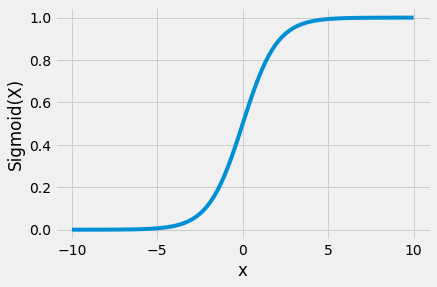

In [ ]:

plt.style.use("fivethirtyeight")
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [ ]:
from sklearn.metrics import log_loss
import numpy as np

def BinaryCrossEntropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)
    term_1 = y_true * np.log(y_pred + 1e-7)
    return -np.mean(term_0+term_1, axis=0)
y_true = np.array([1,0,1,1,0])
y_pred = np.array([0.8, 0.5, 0.9, 0.9, 0.1])
print(BinaryCrossEntropy(y_true, y_pred))
print(log_loss(y_true, y_pred))

0.24647432410286943
0.24647445576952678


In [ ]:
#Ex4:
digits = load_digits()
print(digits.data.shape)
print(digits.DESCR)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.15)


(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted 

<Figure size 432x288 with 0 Axes>

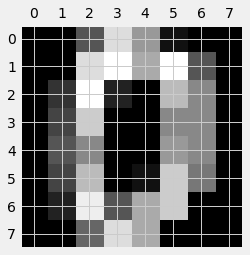

In [ ]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average = 'macro'))
print(f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9481481481481482
0.9481481481481482
0.9487202380952381
0.9477121028175904
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.90      0.96      0.93        28
           2       1.00      0.91      0.95        32
           3       0.93      0.88      0.90        32
           4       1.00      0.95      0.97        20
           5       0.86      1.00      0.93        32
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        23
           8       0.95      0.79      0.86        24
           9       0.89      1.00      0.94        24

    accuracy                           0.95       270
   macro avg       0.95      0.95      0.95       270
weighted avg       0.95      0.95      0.95       270

[[23  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  1  0]
 [ 0  1 29  2  0  0  0  0  0  0]
 [ 0  0  0 28  0  3  0  0  0  1]
 [ 0  0  0  0 19  0  0  0  0  1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
class LogisticRegression():
  def set_values(self, intial_params, alpha = 0.01, max_iter = 5000, class_of_interest = 0):
    self.params = intial_params
    self.alpha = alpha
    self.max_iter = max_iter
    self.class_of_interest = class_of_interest
  @staticmethod
  def _sigmoid(x):
    return 1/(1+np.exp(-x))
  def predict(self, x_bar, params):
    return self._sigmoid(np.dot(params, x_bar))
  def _compute_cost(self, input_var, output_var, params):
    cost =0
    for x, y in zip(input_var, output_var):
      x_bar = np.array(np.insert(x, 0, 1))
      y_hat = self.predict(x_bar, params)
      y_binary = 1.0 if y == self.class_of_interest else 0.0
      cost += y_binary + np.log(y_hat) + (1.0 - y_binary) + np.log(1 - y_hat)
  def train(self, input_var, label, print_iter = 5000):
    """Using the batch gradient descent"""
    iteration = 1
    while iteration < self.max_iter:
      for i, xy in enumerate(zip(input, label)):
        x_bar = np.array(np.insert(xy[0], 0, 1))
        y_hat = self.predict(x_bar, self.params)

        y_binary = 1.0 if xy[1] == self.class_of_interest else 0.0
        gradient = (y_binary - y_hat) * x_bar
        self.params = self.alpha * gradient
      iteration += 1
    return self.params, cost, params_store
  